## 0. Load the data + packages 

In [28]:
# add all the needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
np.random.seed(245)

In [29]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#data = pd.read_csv('C:/Users/kevin/Desktop/Data Literacy/Project/brca_metabric_clinical_data.tsv', sep='\t', header=0)
data = pd.read_csv('Data/brca_metabric_clinical_data.tsv', sep='\t', header=0)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Study ID                        2509 non-null   object 
 1   Patient ID                      2509 non-null   object 
 2   Sample ID                       2509 non-null   object 
 3   Age at Diagnosis                2498 non-null   float64
 4   Type of Breast Surgery          1955 non-null   object 
 5   Cancer Type                     2509 non-null   object 
 6   Cancer Type Detailed            2509 non-null   object 
 7   Cellularity                     1917 non-null   object 
 8   Chemotherapy                    1980 non-null   object 
 9   Pam50 + Claudin-low subtype     1980 non-null   object 
 10  Cohort                          2498 non-null   float64
 11  ER status measured by IHC       2426 non-null   object 
 12  ER Status                       24

#### a) Explore the data

In [30]:
# drop irrelevant columns
df = data.drop(["Study ID", "Sample ID", "Cancer Type", "Cohort", "Number of Samples Per Patient", 
                 "Sex", "Sample Type"], axis = 1, inplace=True)

df = data.set_index('Patient ID')

columns_list = df.columns.tolist()

column_names = pd.DataFrame(columns_list, columns=['column_names'])
column_names


,column_names
0,Age at Diagnosis
1,Type of Breast Surgery
2,Cancer Type Detailed
3,Cellularity
4,Chemotherapy
5,Pam50 + Claudin-low subtype
6,ER status measured by IHC
7,ER Status
8,Neoplasm Histologic Grade
9,HER2 status measured by SNP6


Tumor Stage
[ 2.  1.  4.  3.  0. nan]


<Axes: xlabel='Tumor Stage'>

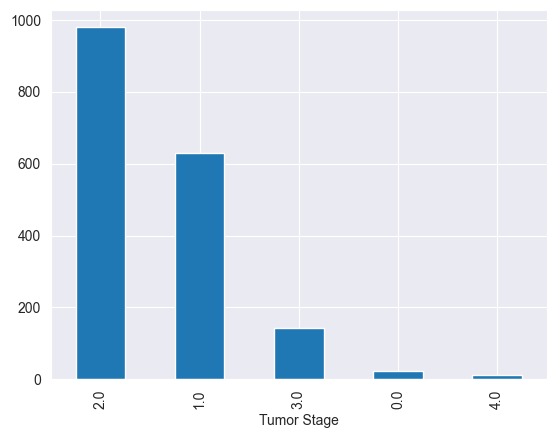

In [31]:
i = 29

print(columns_list[i])
print(data[columns_list[i]].unique())
#print(df[columns_list[i]].value_counts())

df[columns_list[i]].value_counts().plot(kind='bar')


In [32]:
def plot_categorical_columns(df, column1, column2):
    """
    Plot two categorical columns against each other.
    
    Parameters:
    - df: pandas DataFrame
    - column1: str, name of the first categorical column
    - column2: str, name of the second categorical column
    """
    # Create a cross-tabulation of the two columns
    cross_tab = pd.crosstab(df[column1], df[column2])
    
    # Plot using seaborn's heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
    
    # Set labels and title
    plt.xlabel(column2)
    plt.ylabel(column1)
    plt.title(f'Plot of {column1} vs {column2}')
    
    # Show the plot
    plt.show()

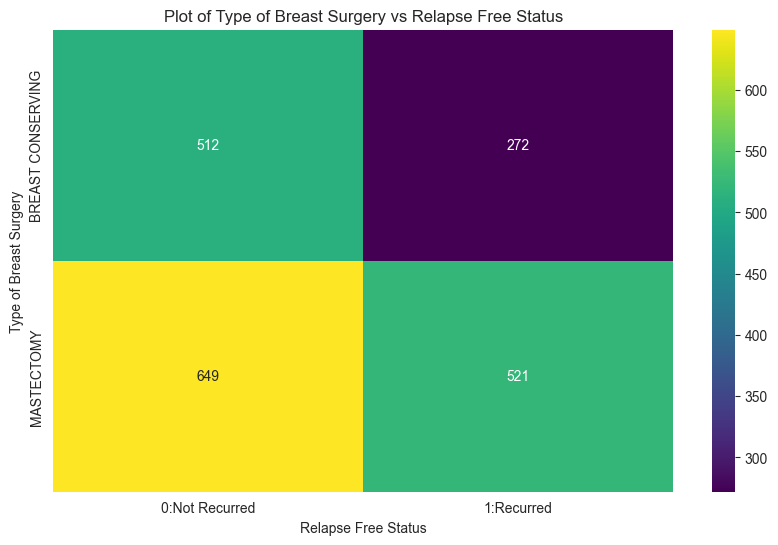

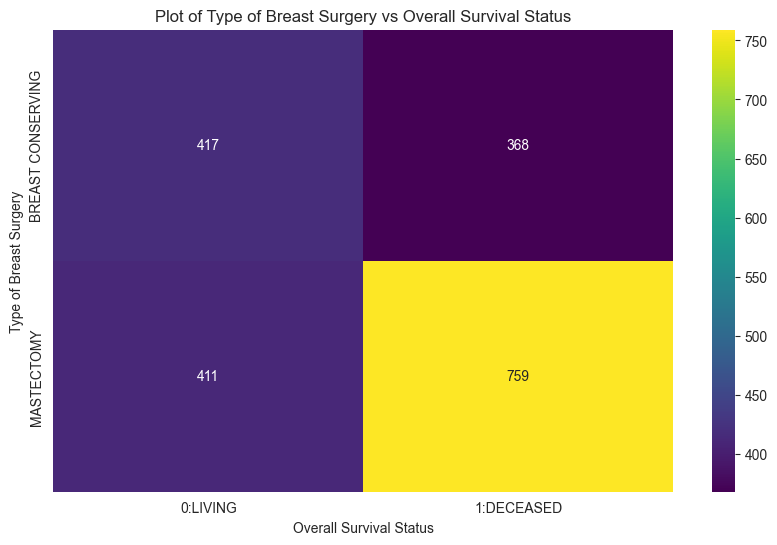

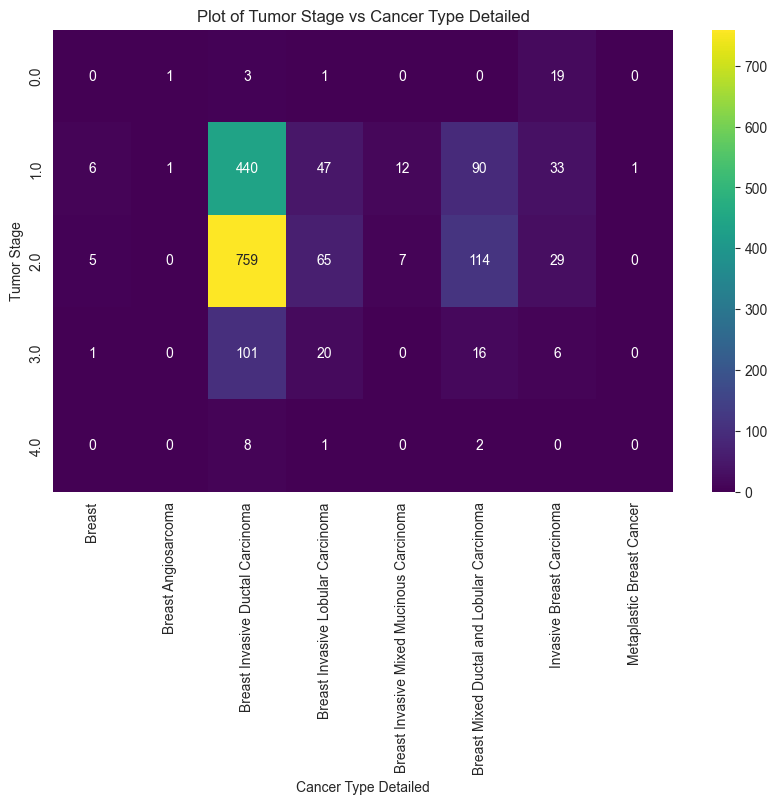

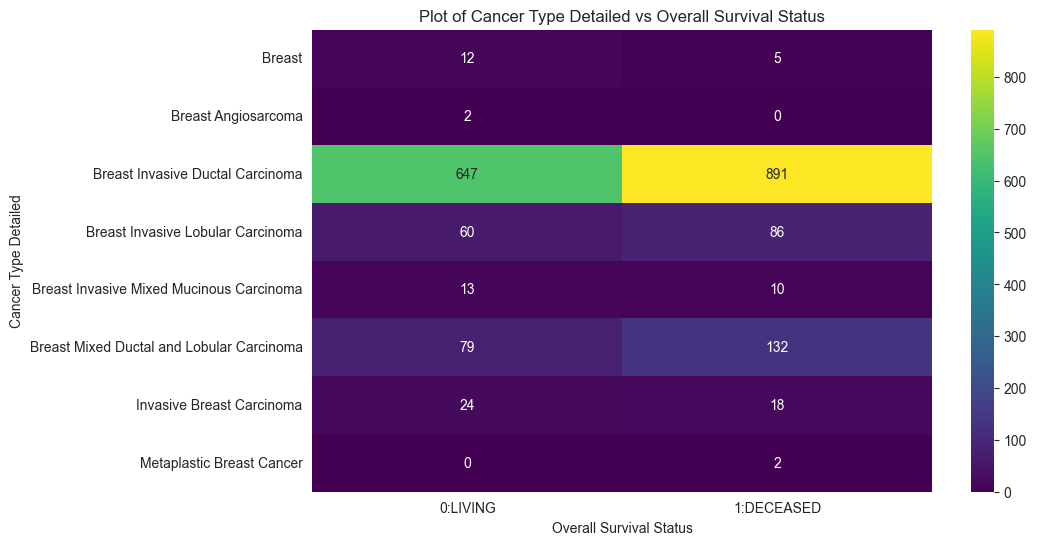

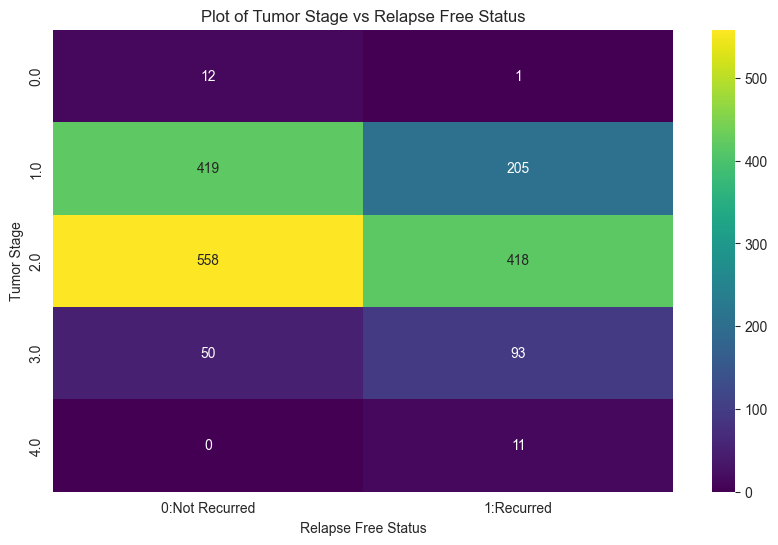

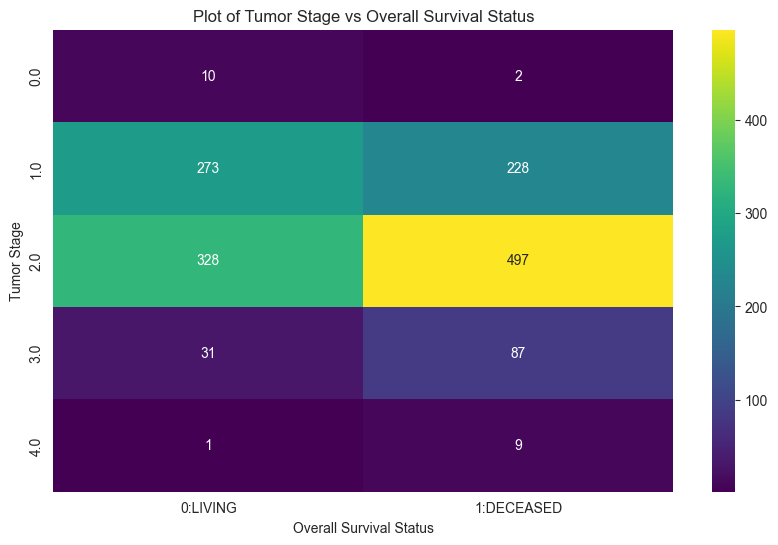

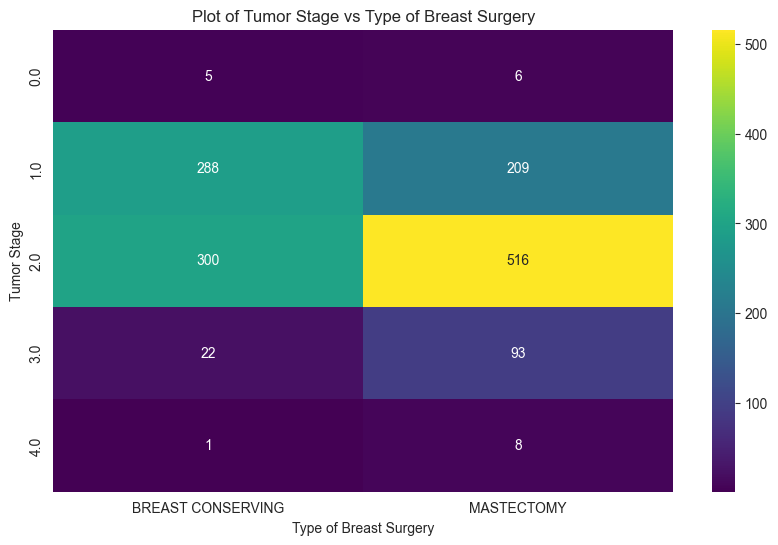

In [35]:
plot_categorical_columns(df, "Type of Breast Surgery", "Relapse Free Status")
plot_categorical_columns(df, "Type of Breast Surgery", "Overall Survival Status")
plot_categorical_columns(df, "Tumor Stage", "Cancer Type Detailed")
plot_categorical_columns(df, "Cancer Type Detailed", "Overall Survival Status")
plot_categorical_columns(df, "Tumor Stage", "Relapse Free Status")
plot_categorical_columns(df, "Tumor Stage", "Overall Survival Status")
plot_categorical_columns(df, "Tumor Stage", "Type of Breast Surgery")

In [23]:
# label_encoder.fit_transform: This transformer should be used to encode target values, i.e. y, and not the input X. 
# --> use this instead? https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder

label_encoder = preprocessing.LabelEncoder()
df["Type of Breast Surgery"] = label_encoder.fit_transform(data["Type of Breast Surgery"])
df["Cancer Type Detailed"] = label_encoder.fit_transform(data["Cancer Type Detailed"])
df["Cellularity"] = label_encoder.fit_transform(data["Cellularity"])
df["Chemotherapy"] = label_encoder.fit_transform(data["Chemotherapy"])
df["Pam50 + Claudin-low subtype"] = label_encoder.fit_transform(data["Pam50 + Claudin-low subtype"])
df["ER status measured by IHC"] = label_encoder.fit_transform(data["ER status measured by IHC"])
df["ER Status"] = label_encoder.fit_transform(data["ER Status"])
df["HER2 status measured by SNP6"] = label_encoder.fit_transform(data["HER2 status measured by SNP6"])
df["HER2 Status"] = label_encoder.fit_transform(data["HER2 Status"])
df["Tumor Other Histologic Subtype"] = label_encoder.fit_transform(data["Tumor Other Histologic Subtype"])
df["Hormone Therapy"] = label_encoder.fit_transform(data["Hormone Therapy"])
df["Inferred Menopausal State"] = label_encoder.fit_transform(data["Inferred Menopausal State"])
df["Integrative Cluster"] = label_encoder.fit_transform(data["Integrative Cluster"])
df["Primary Tumor Laterality"] = label_encoder.fit_transform(data["Primary Tumor Laterality"])
df["Oncotree Code"] = label_encoder.fit_transform(data["Oncotree Code"])
df["PR Status"] = label_encoder.fit_transform(data["PR Status"])
df["Relapse Free Status"] = label_encoder.fit_transform(data["Relapse Free Status"])
df["3-Gene classifier subtype"] = label_encoder.fit_transform(data["3-Gene classifier subtype"])
df["Patient's Vital Status"] = label_encoder.fit_transform(data["Patient's Vital Status"])
df["Radio Therapy"] = label_encoder.fit_transform(data["Radio Therapy"])
df["Overall Survival Status"] = label_encoder.fit_transform(data["Overall Survival Status"])


##### Remove values instead???
df['Mutation Count'] = df['Mutation Count'].fillna(0)
df['Neoplasm Histologic Grade'] = df['Neoplasm Histologic Grade'].fillna(0)
df['Lymph nodes examined positive'] = df['Lymph nodes examined positive'].fillna(0)
df['Nottingham prognostic index'] = df['Nottingham prognostic index'].fillna(0)
df['Age at Diagnosis'] = df['Age at Diagnosis'].fillna(0)
df['Overall Survival (Months)'] = df['Overall Survival (Months)'].fillna(0)
df['Relapse Free Status (Months)'] = df['Relapse Free Status (Months)'].fillna(0)
df['Tumor Size'] = df['Tumor Size'].fillna(0)
df['Tumor Stage'] = df['Tumor Stage'].fillna(0)
# test if any columns have NaN's
#df.isna().any()

df.head(5)

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MB-0000,75.65,1,2,3,0,6,1,1,3.0,2,0,0,1,0,4,1,10.0,0.0,6.044,2,140.500000,0,0,1,138.65,0,2,0.000000,22.0,2.0,2
MB-0002,43.19,0,2,0,0,2,1,1,3.0,2,0,0,1,1,4,1,0.0,2.0,4.020,2,84.633333,0,1,1,83.52,0,0,2.615035,10.0,1.0,2
MB-0005,48.87,1,2,0,1,3,1,1,2.0,2,0,0,1,1,3,1,1.0,2.0,4.030,2,163.700000,1,1,0,151.28,1,4,2.615035,15.0,2.0,0
MB-0006,47.68,1,5,2,1,3,1,1,2.0,2,0,4,1,1,10,1,3.0,1.0,4.050,6,164.933333,0,1,1,162.76,0,4,1.307518,25.0,2.0,2
MB-0008,76.97,1,5,0,1,3,1,1,3.0,2,0,4,1,0,10,1,8.0,2.0,6.080,6,41.366667,1,1,1,18.55,1,0,2.615035,40.0,2.0,0


## 2. Analysis
- do some kind of cluster analysis?
--> https://pypi.org/project/kmodes/

#### Hypotheses:
- ?



<Axes: >

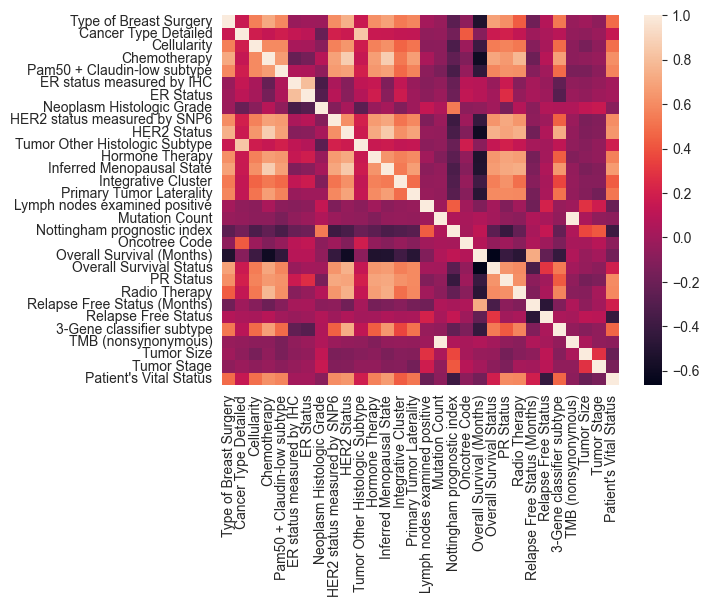

In [24]:
# Correlation matrix
cols = df.columns[1:]
corr = df[cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Explained variation per principal component: [0.62060947 0.37188692 0.00355719]


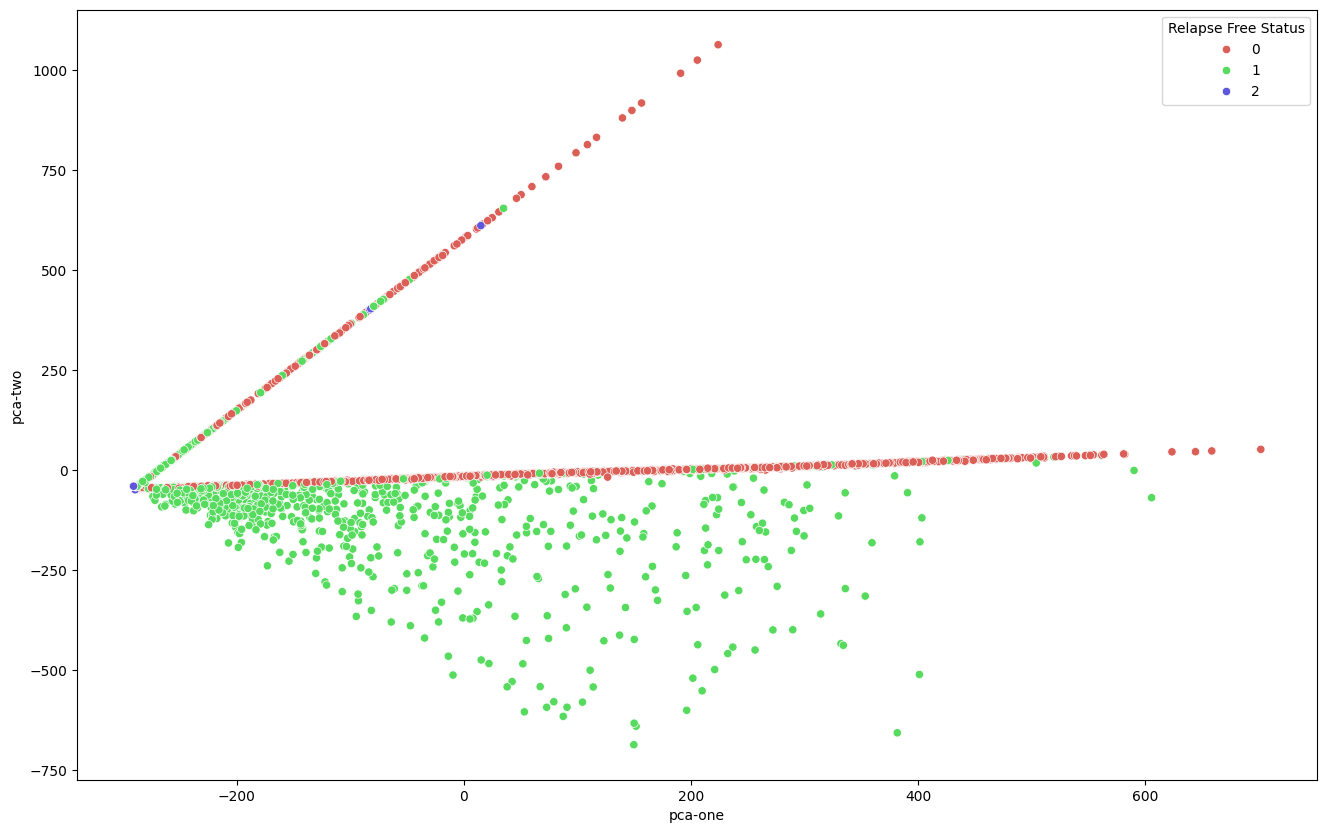

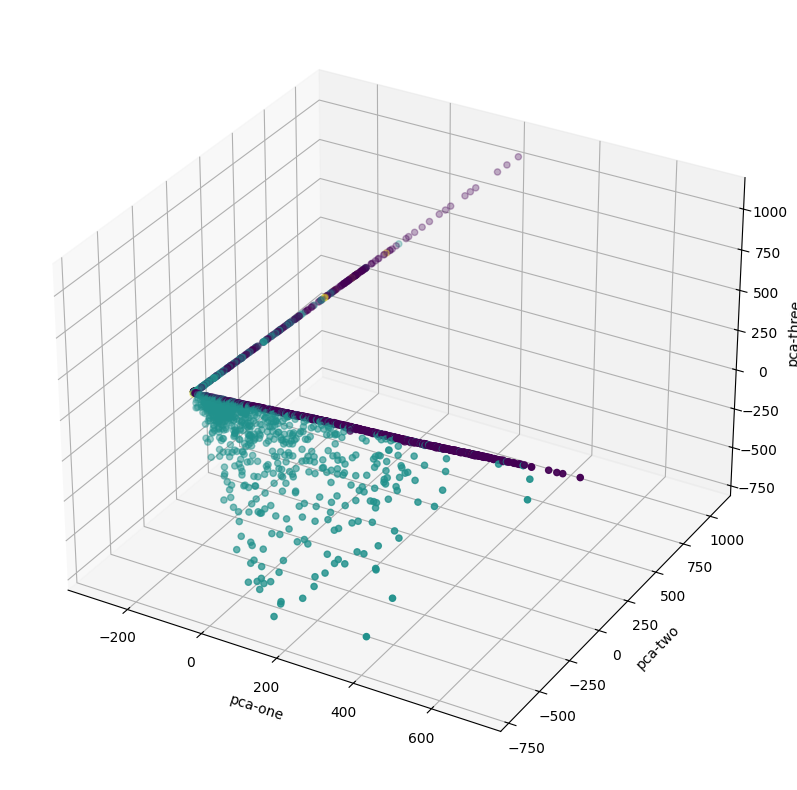

In [54]:
# PCA Analysis

cols = df.columns[1:]

# I did not normalize the data yet

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Relapse Free Status",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=1
)

ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["Relapse Free Status"],
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# https://stats.stackexchange.com/questions/204994/what-does-a-wedge-like-shape-of-the-pca-plot-indicate

In [55]:
# t-SNE analysis
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df[cols])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2509 samples in 0.001s...
[t-SNE] Computed neighbors for 2509 samples in 0.074s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2509
[t-SNE] Computed conditional probabilities for sample 2000 / 2509
[t-SNE] Computed conditional probabilities for sample 2509 / 2509
[t-SNE] Mean sigma: 12.423831
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.755161
[t-SNE] KL divergence after 1000 iterations: 0.403790


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

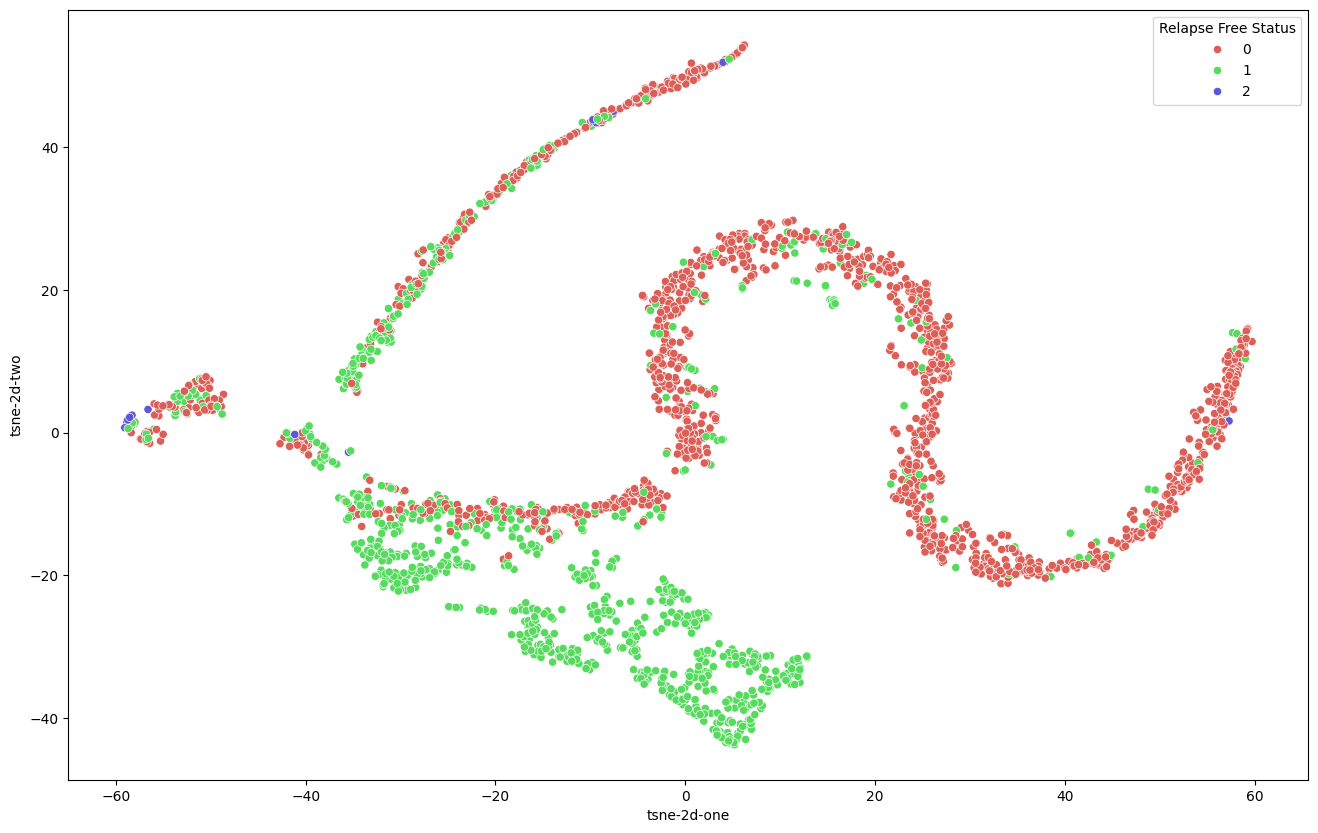

In [56]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Relapse Free Status",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=1
)

In [117]:

from kmodes.kmodes import KModes

km = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df)

# Print the cluster centroids
#print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 958, cost: 30895.0
Run 1, iteration: 2/100, moves: 341, cost: 30723.0
Run 1, iteration: 3/100, moves: 157, cost: 30705.0
Run 1, iteration: 4/100, moves: 11, cost: 30705.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1132, cost: 30827.0
Run 2, iteration: 2/100, moves: 283, cost: 30767.0
Run 2, iteration: 3/100, moves: 40, cost: 30767.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 816, cost: 30687.0
Run 3, iteration: 2/100, moves: 344, cost: 30602.0
Run 3, iteration: 3/100, moves: 27, cost: 30600.0
Run 3, iteration: 4/100, moves: 2, cost: 30600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 784, cost: 30852.0
Run 4, iteration: 2/100, moves: 185, cost: 30852.0
Init: initializing ce

In [118]:
df.columns

Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


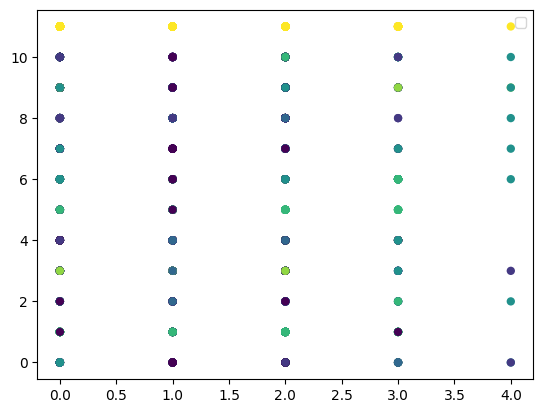

In [122]:
# add the clusters as a column to the original df
df["cluster"] = clusters.tolist()

fig, ax = plt.subplots()
plt.scatter(df["Tumor Stage"], df["Integrative Cluster"], c = df["cluster"], edgecolors='none')
ax.legend()

